In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.rc('figure',figsize=(20,10))
import seaborn as sns
sns.despine()
sns.set_style('whitegrid')

import warnings
warnings.filterwarnings('ignore')

<Figure size 2000x1000 with 0 Axes>

In [2]:
rendf = pd.read_csv('../Dataset/renewablePowerGeneration97-17.csv')

In [7]:
rendf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              28 non-null     int64  
 1   Hydro(TWh)        28 non-null     float64
 2   Biofuel(TWh)      28 non-null     float64
 3   Solar PV (TWh)    28 non-null     float64
 4   Geothermal (TWh)  28 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 1.2 KB


In [3]:
rendf.head()

,Year,Hydro(TWh),Biofuel(TWh),Solar PV (TWh),Geothermal (TWh)
0,1990,2191.67,3.88,0.09,36.42
1,1991,2268.63,4.19,0.10,37.39
2,1992,2267.16,4.63,0.12,39.30
3,1993,2397.67,5.61,0.15,40.23
4,1994,2419.73,7.31,0.17,41.05


One of the aims of this project is to analyze trends in renewable energy adoption worldwide.

1. To show the trend of each renewable energies throughout the years.

#### YEARLY DATA VISUALIZATION

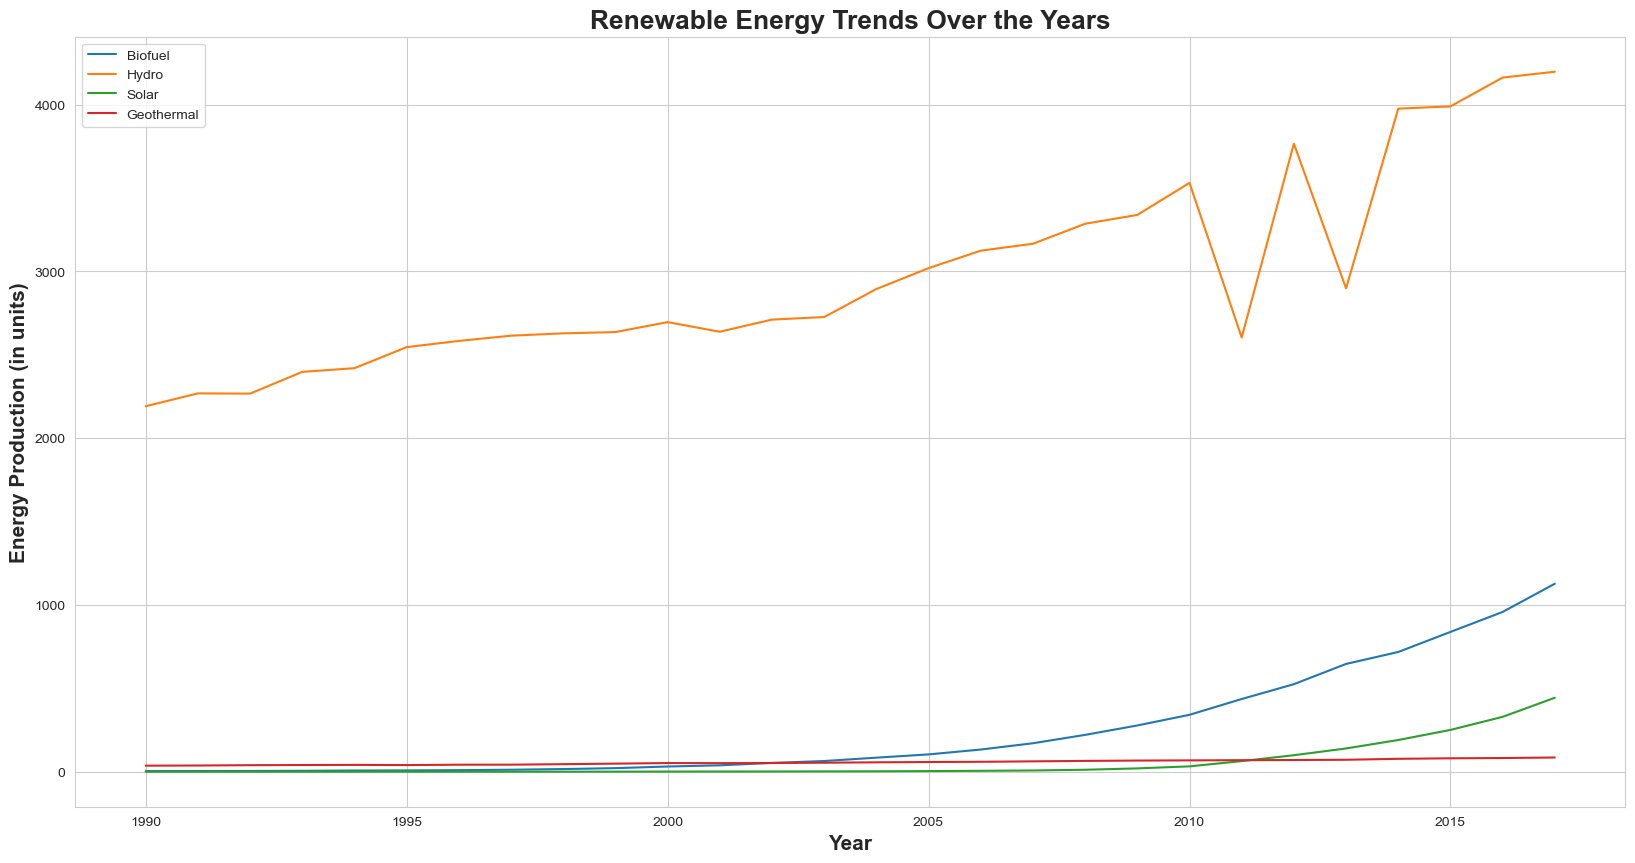

In [11]:
sns.lineplot(data=rendf, x='Year', y='Biofuel(TWh)', label='Biofuel')
sns.lineplot(data=rendf, x='Year', y='Hydro(TWh)', label='Hydro')
sns.lineplot(data=rendf, x='Year', y='Solar PV (TWh)', label='Solar')
sns.lineplot(data=rendf, x='Year', y='Geothermal (TWh)', label='Geothermal')

# Add labels and legend
plt.xlabel('Year', fontsize= 15, fontweight = 'bold')
plt.ylabel('Energy Production (in units)', fontsize= 15, fontweight = 'bold')
plt.title('Renewable Energy Trends Over the Years', fontsize= 19, fontweight = 'bold')
title.
plt.legend()

# Show the plot
plt.show()

1. From the chart we can see that only Hydro is the renewable energy used since 1990.
2. Every other renewable energies was not in use until late 2004- early 2005.
3. Biofuel and Solar experienced a slow but steady increase after from 2005- 2015.
4. Geothermal is the only renewable energy that has no increase from 1990-2015.
5. Hydro experienced its best power generation from 2015-2017, and its worst decline from 2010-2015 right before the best power generation.

RENEWABLE ENERGIES TREND IN COUNTRIES

In [12]:
t2odf = pd.read_csv('../Dataset/top20CountriesPowerGeneration.csv')

In [13]:
t2odf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           20 non-null     object 
 1   Hydro(TWh)        20 non-null     float64
 2   Biofuel(TWh)      20 non-null     float64
 3   Solar PV (TWh)    20 non-null     float64
 4   Geothermal (TWh)  20 non-null     float64
 5   Total (TWh)       20 non-null     float64
dtypes: float64(5), object(1)
memory usage: 1.1+ KB


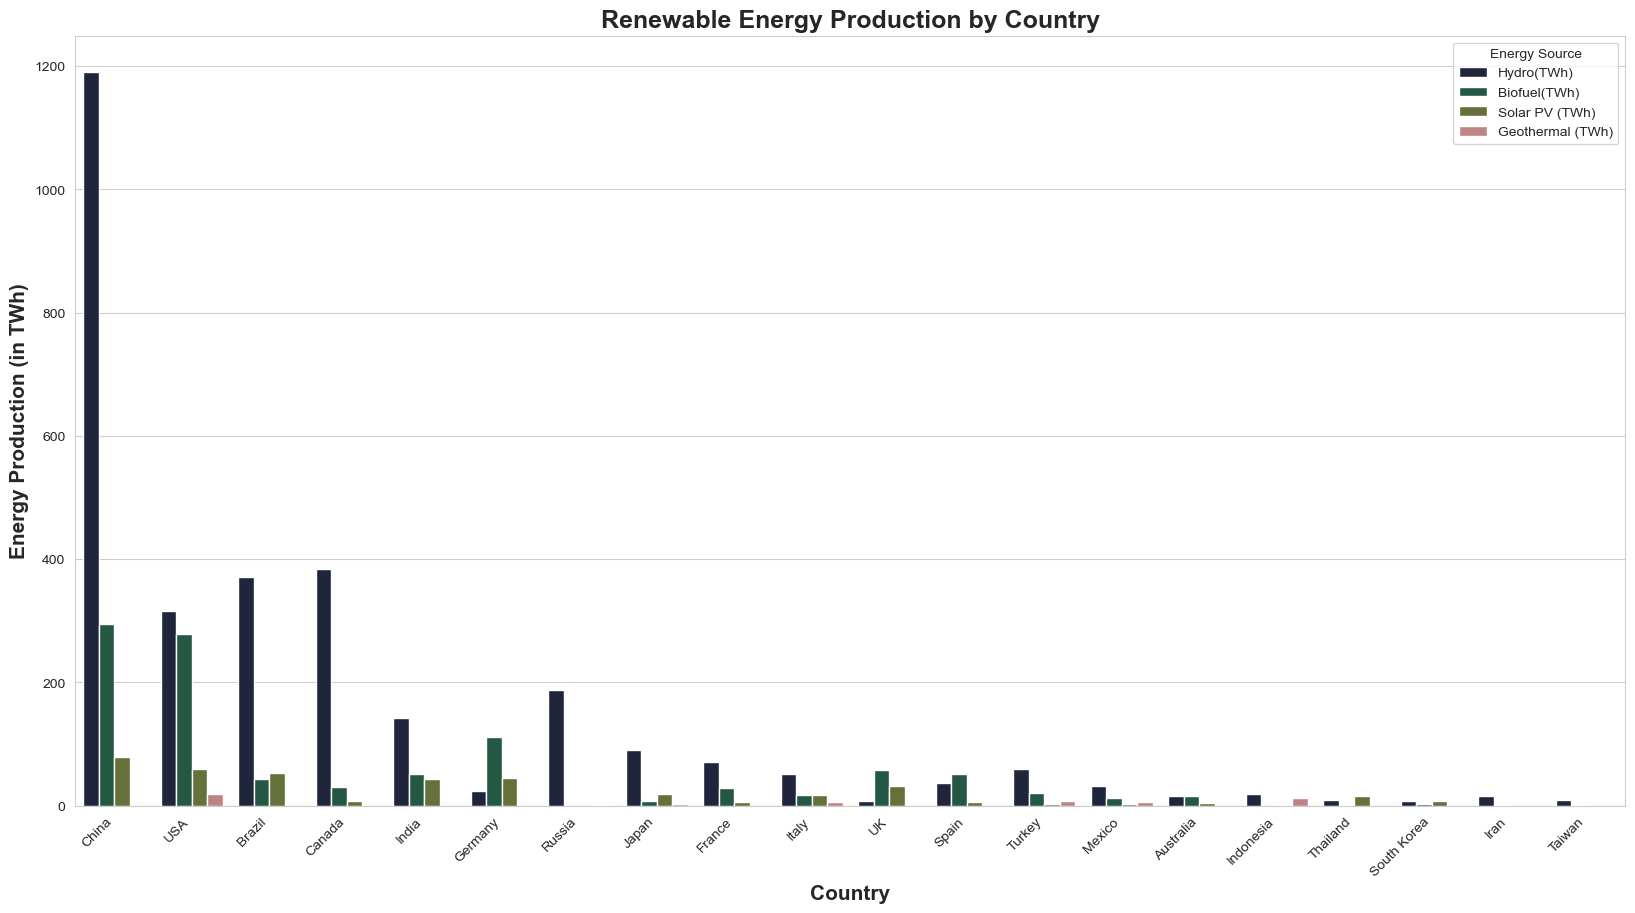

In [43]:
t2odf_melted = t2odf.melt(id_vars='Country', var_name='Energy Source', value_name='Energy (TWh)')

# Filter out the "Total (TWh)" column
t2odf_melted = t2odf_melted[t2odf_melted['Energy Source'] != 'Total (TWh)']

# Set custom colors
colors = sns.color_palette("cubehelix")





# Create a bar plot using Seaborn
sns.barplot(data=t2odf_melted, x='Country', y='Energy (TWh)', hue='Energy Source', palette=colors, ci=None)


# Add labels and legend
plt.xlabel('Country', fontsize = 15, fontweight='bold')
plt.ylabel('Energy Production (in TWh)', fontsize = 15, fontweight='bold')
plt.title('Renewable Energy Production by Country', fontsize= 18, fontweight='bold')
plt.legend(title='Energy Source', loc='upper right')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Make the bars wider


plt.show()


TOP 3 COUNTRIES LEADING PER RESOURCES

1. Hydro -- China, Canada, Brazil.
2. Biofuel -- China,USA, Germany
3. Solar PV
4. Geothermal

Text(0.5, 1.0, 'Total Renewable Energy Production by Country')

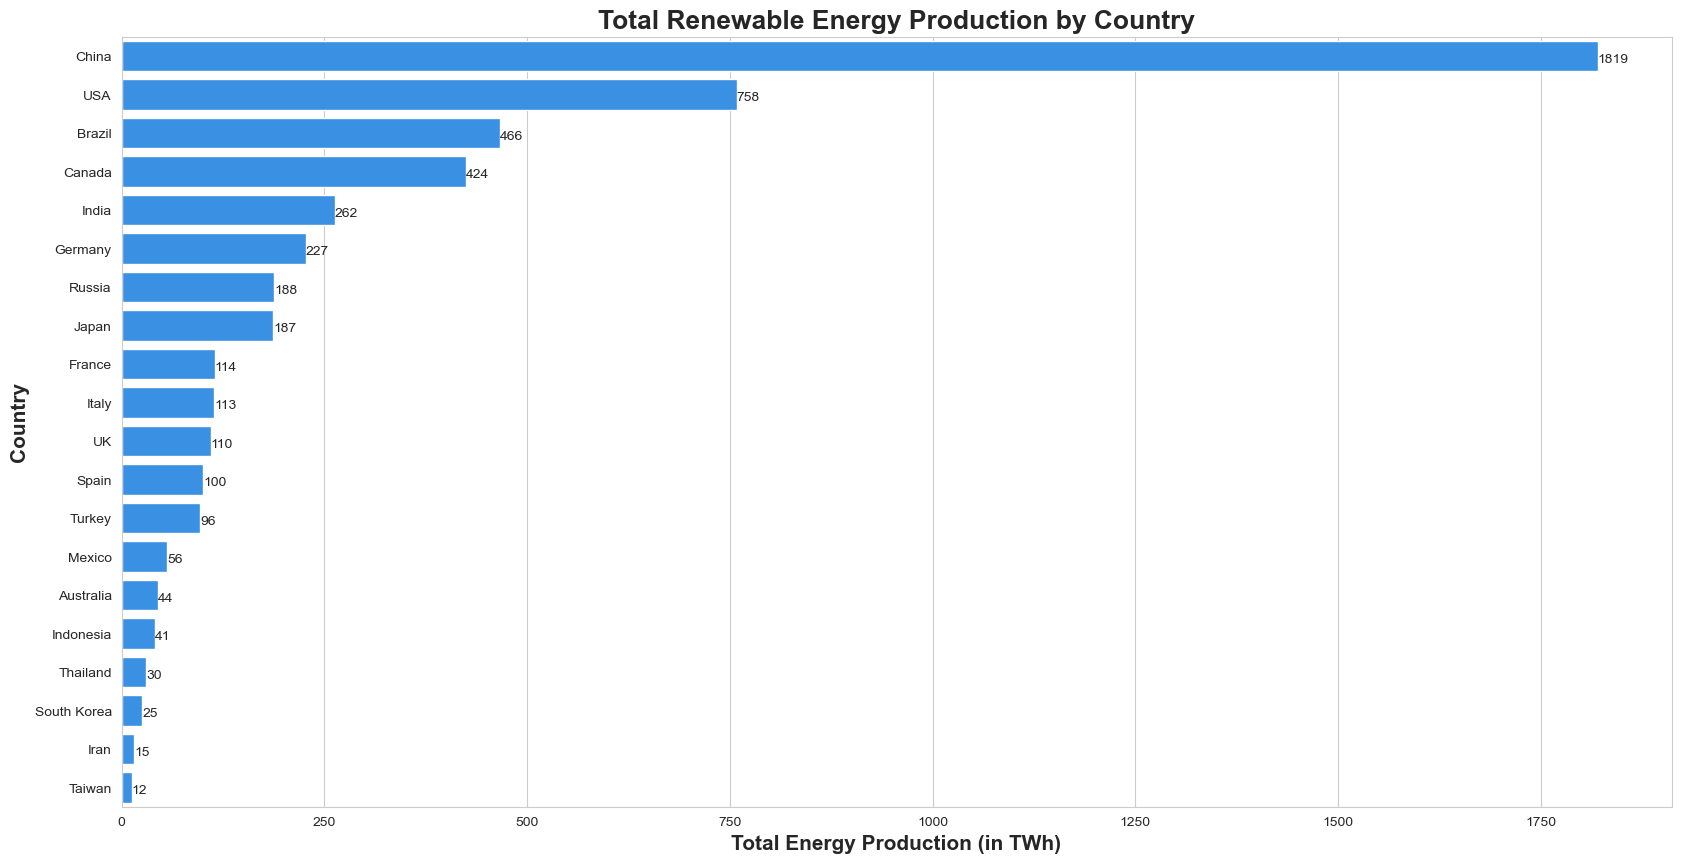

In [56]:
Customcolor = 'dodgerblue'
t2plot = sns.barplot(x='Total (TWh)',y = 'Country', data = t2odf, color=Customcolor)

ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{int(p.get_width()):d}', (p.get_width(), p.get_y()+ 0.6 * p.get_height()), ha='left', va='center')

# Add labels and legend
plt.xlabel('Total Energy Production (in TWh)', fontsize = 15, fontweight='bold')
plt.ylabel('Country', fontsize = 15, fontweight='bold')
plt.title('Total Renewable Energy Production by Country', fontsize = 19, fontweight='bold')